#Steam Game Recommendation

## Importing data and Data understanding

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('steam.csv')

In [3]:
df

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

## EDA and Data Preprocessing

In [5]:
df.isnull().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

there is no missing values!

In [6]:
df = df.assign(overall_reviews=df.positive_ratings + df.negative_ratings)
df = df.assign(free=df.price == 0)
df['release_date'] = pd.to_datetime(df['release_date'])

Created additional columns and feature engineeer for further analysis

In [7]:
df.duplicated().sum()

0

In [8]:
df

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,overall_reviews,free
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,127873,False
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,3951,False
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,3814,False
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,1540,False
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,5538,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09,3,False
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69,9,False
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99,1,False
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19,2,False


there is no duplicated values!

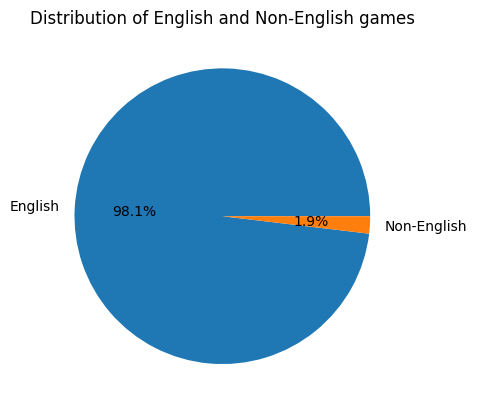

In [15]:
english_counts = df['english'].value_counts()
labels = 'English', 'Non-English'

plt.pie(english_counts, labels=labels, autopct='%1.1f%%',)

plt.title('Distribution of English and Non-English games')
plt.show()

In [ ]:
df['english'].value_counts()

english
1    26564
0      511
Name: count, dtype: int64

Almost 99% of the games on steam are English compared to the non englsih

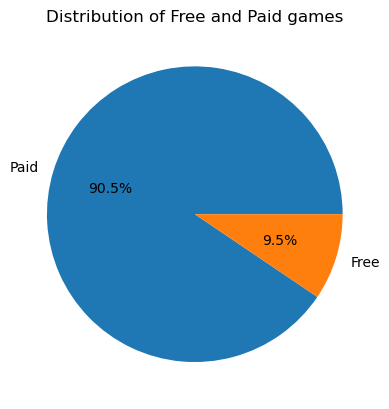

In [ ]:
free_counts = df['free'].value_counts()
labels = 'Paid', 'Free'

plt.pie(free_counts, labels=labels, autopct='%1.1f%%')

plt.title('Distribution of Free and Paid games')
plt.show()

In [ ]:
df['free'].value_counts()

free
False    24515
True      2560
Name: count, dtype: int64

Most games on steam are paid games, however almost 10% of the games available on steam are free

In [ ]:
df['required_age'].value_counts()

required_age
0     26479
18      308
16      192
12       73
7        12
3        11
Name: count, dtype: int64

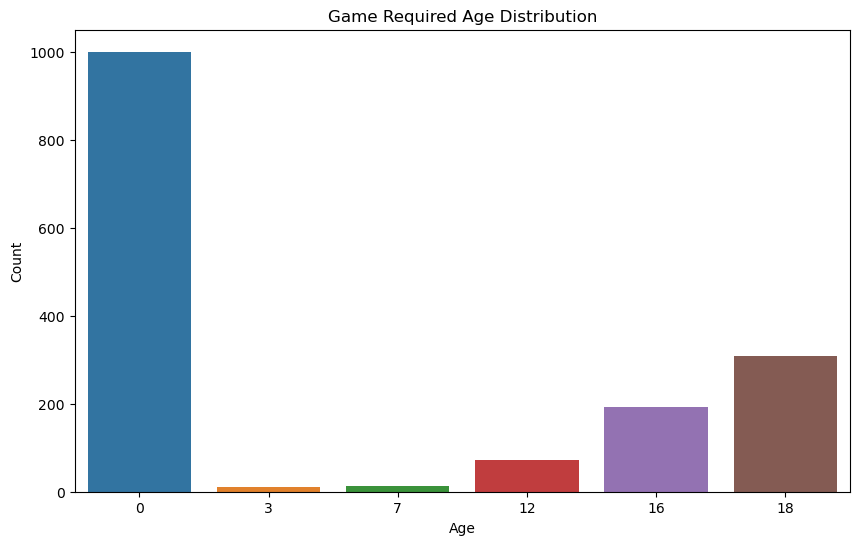

In [ ]:
counts = df['required_age'].value_counts()

counts.loc[0] = 1000

plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts)

plt.title('Game Required Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

There are more than 1000 games that are available for all ages. Second being 18 and the least is 3

In [ ]:
df['positive_ratings'].nlargest(n=10)

25       2644404
22        863507
19        515879
12836     496184
121       363721
2478      329061
1467      308657
3362      292574
1120      255600
21        251789
Name: positive_ratings, dtype: int64

In [ ]:
df.query("positive_ratings >= 251789").sort_values(by="positive_ratings", ascending=False)[["name", "developer", "publisher", "genres", "positive_ratings"]]

,name,developer,publisher,genres,positive_ratings
25,Counter-Strike: Global Offensive,Valve;Hidden Path Entertainment,Valve,Action;Free to Play,2644404
22,Dota 2,Valve,Valve,Action;Free to Play;Strategy,863507
19,Team Fortress 2,Valve,Valve,Action;Free to Play,515879
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,PUBG Corporation,PUBG Corporation,Action;Adventure;Massively Multiplayer,496184
121,Garry's Mod,Facepunch Studios,Valve,Indie;Simulation,363721
2478,Grand Theft Auto V,Rockstar North,Rockstar Games,Action;Adventure,329061
1467,PAYDAY 2,OVERKILL - a Starbreeze Studio.,Starbreeze Publishing AB,Action;RPG,308657
3362,Unturned,Smartly Dressed Games,Smartly Dressed Games,Action;Adventure;Casual;Free to Play;Indie,292574
1120,Terraria,Re-Logic,Re-Logic,Action;Adventure;Indie;RPG,255600
21,Left 4 Dead 2,Valve,Valve,Action,251789


Above shows the top 10 game with the most positive ratings. The Counter-Strike: Global Offensive being the first with more than 2 million positive ratings. Lastly is Left 4 dead 2 with only 251,789 positive ratings. We can also see that most of the games are action genre

In [ ]:
df['negative_ratings'].nlargest(n=10)

12836    487076
25       402313
22       142079
2478     139308
7809      91664
1506      77169
4712      66603
5235      59620
1467      56523
2563      56488
Name: negative_ratings, dtype: int64

In [ ]:
df.query("negative_ratings >= 56488").sort_values(by="negative_ratings", ascending=False)[["name", "developer", "publisher", "genres", "negative_ratings"]]

,name,developer,publisher,genres,negative_ratings
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,PUBG Corporation,PUBG Corporation,Action;Adventure;Massively Multiplayer,487076
25,Counter-Strike: Global Offensive,Valve;Hidden Path Entertainment,Valve,Action;Free to Play,402313
22,Dota 2,Valve,Valve,Action;Free to Play;Strategy,142079
2478,Grand Theft Auto V,Rockstar North,Rockstar Games,Action;Adventure,139308
7809,Z1 Battle Royale,NantG,Daybreak Game Company,Action;Adventure;Free to Play;Massively Multip...,91664
1506,DayZ,Bohemia Interactive,Bohemia Interactive,Action;Adventure;Massively Multiplayer,77169
4712,ARK: Survival Evolved,Studio Wildcard;Instinct Games;Efecto Studios;...,Studio Wildcard,Action;Adventure;Indie;Massively Multiplayer;RPG,66603
5235,Tom Clancy's Rainbow Six® Siege,Ubisoft Montreal,Ubisoft,Action,59620
1467,PAYDAY 2,OVERKILL - a Starbreeze Studio.,Starbreeze Publishing AB,Action;RPG,56523
2563,No Man's Sky,Hello Games,Hello Games,Action;Adventure,56488


Above shows the top 10 games with the most negative ratings. The first being Playerunknown Battlegrounds with more than 450,000 negative ratings. Also we can see that all of the games contain the genre action

In [ ]:
df['overall_reviews'].nlargest(n=10)

25       3046717
22       1005586
12836     983260
19        549915
2478      468369
121       380154
1467      365180
3362      324056
5235      310798
2016      274079
Name: overall_reviews, dtype: int64

In [ ]:
df.query("overall_reviews >= 274079").sort_values(by="overall_reviews", ascending=False)[["name", "developer", "publisher", "genres", "overall_reviews"]]

,name,developer,publisher,genres,overall_reviews
25,Counter-Strike: Global Offensive,Valve;Hidden Path Entertainment,Valve,Action;Free to Play,3046717
22,Dota 2,Valve,Valve,Action;Free to Play;Strategy,1005586
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,PUBG Corporation,PUBG Corporation,Action;Adventure;Massively Multiplayer,983260
19,Team Fortress 2,Valve,Valve,Action;Free to Play,549915
2478,Grand Theft Auto V,Rockstar North,Rockstar Games,Action;Adventure,468369
121,Garry's Mod,Facepunch Studios,Valve,Indie;Simulation,380154
1467,PAYDAY 2,OVERKILL - a Starbreeze Studio.,Starbreeze Publishing AB,Action;RPG,365180
3362,Unturned,Smartly Dressed Games,Smartly Dressed Games,Action;Adventure;Casual;Free to Play;Indie,324056
5235,Tom Clancy's Rainbow Six® Siege,Ubisoft Montreal,Ubisoft,Action,310798
2016,Rust,Facepunch Studios,Facepunch Studios,Action;Adventure;Indie;Massively Multiplayer;RPG,274079


Above shows the top 10 games with over all best reviews. Now we can see that Counter Strike Global Offensive, Dota 2 and Playerunknown Battle grounds are always in the top 3.

In [21]:
df['developer'].value_counts()

Choice of Games               94
KOEI TECMO GAMES CO., LTD.    72
Ripknot Systems               62
Laush Dmitriy Sergeevich      51
Nikita "Ghost_RUS"            50
                              ..
CRAPPY ZOMBIE GAME STUDIO      1
Ramon Mujica                   1
Oomst Games                    1
Joe Censored Games             1
Adept Studios GD               1
Name: developer, Length: 17113, dtype: int64

In [22]:
top_10_devs = (
    df.groupby("developer")
    .agg(games=("name", "count"), reviews=("overall_reviews", "sum"))
    .reset_index()
    .sort_values(by="reviews", ascending=False)
    .head(10)
)
top_10_devs

,developer,games,reviews
15120,Valve;Hidden Path Entertainment,1,3046717
15118,Valve,26,2474157
10448,PUBG Corporation,1,983260
4759,Facepunch Studios,4,654503
1614,Bethesda Game Studios,10,561774
11952,Rockstar North,4,470048
14873,Ubisoft Montreal,19,442215
10080,OVERKILL - a Starbreeze Studio.,1,365180
1969,Bohemia Interactive,16,355603
12900,Smartly Dressed Games,1,324056


In [17]:
df_plat = df['platforms'].str.split(';').explode()
df_platforms = df_plat.value_counts().reset_index()
df_platforms.columns = ['platforms', 'counts']

In [18]:
df_plat.value_counts()

windows    27070
mac         8066
linux       5235
Name: platforms, dtype: int64

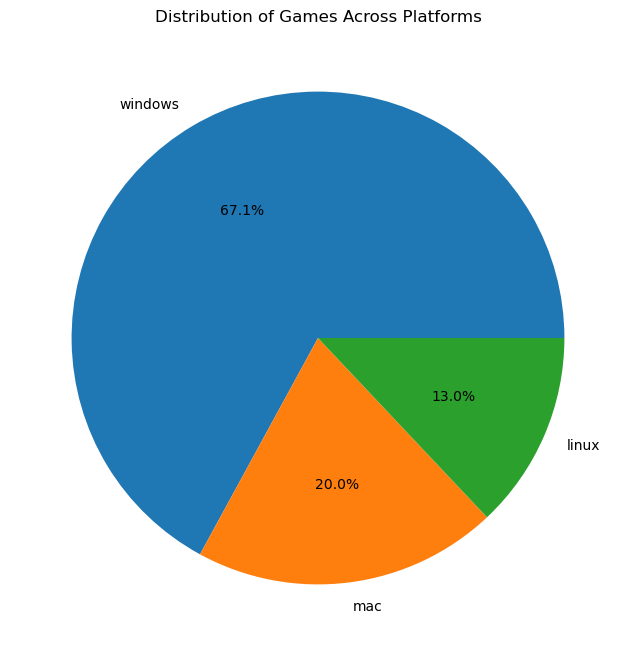

In [ ]:
plt.figure(figsize=(8, 8))
labels = df_platforms['platforms'].to_list()
counts = df_platforms['counts'].to_list()
plt.pie(counts, labels=labels, autopct="%1.1f%%")
plt.title("Distribution of Games Across Platforms")
plt.show()

Pie chart above shows the different games across different platforms, the most being Windows and the least being compatible is linux.

In [ ]:
diff_genres = df['genres'].apply(lambda x: x.split(';')[0]).value_counts()
diff_genres

genres
Action                   11212
Adventure                 5256
Casual                    4373
Indie                     2623
Violent                    709
Simulation                 631
Strategy                   532
RPG                        407
Free to Play               395
Sexual Content             245
Racing                     197
Nudity                     112
Sports                      83
Gore                        81
Animation & Modeling        66
Utilities                   60
Design & Illustration       28
Massively Multiplayer       16
Audio Production            16
Education                   14
Early Access                 9
Video Production             5
Accounting                   2
Web Publishing               1
Photo Editing                1
Software Training            1
Name: count, dtype: int64

In [ ]:
diff_genres.nlargest(n=10)

genres
Action            11212
Adventure          5256
Casual             4373
Indie              2623
Violent             709
Simulation          631
Strategy            532
RPG                 407
Free to Play        395
Sexual Content      245
Name: count, dtype: int64

##RECOMMENDATION SYSTEM

In [ ]:
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,overall_reviews,free
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,127873,False
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,3951,False
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,3814,False
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,1540,False
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,5538,False


### Content Based recommendation

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from tabulate import tabulate

In [ ]:
df['combined_features'] = df['name'] + ' ' + df['platforms'] + ' ' + df['steamspy_tags'] + ' ' + df['overall_reviews'].astype(str) + ' ' + df['price'].astype(str)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

In [ ]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])

In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
def get_content_based_recommendations(title, cosine_sim_matrix, df):
    idx = df[df['name'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Exclude the game itself, take top 10
    game_indices = [i[0] for i in sim_scores]
    recommended_games = df.iloc[game_indices][['name', 'platforms', 'steamspy_tags', 'overall_reviews', 'price']]
    return recommended_games

In [ ]:
game_title = 'Grand Theft Auto V'
content_based_recommendations = get_content_based_recommendations(game_title, cosine_sim, df)

In [ ]:
table = tabulate(content_based_recommendations, headers='keys', tablefmt='pretty', showindex=False)

In [ ]:
print(f"Recommended games for {game_title}:")
print(table)

Recommended games for Grand Theft Auto V:
+----------------------------------------------+-----------+-------------------------------+-----------------+-------+
|                     name                     | platforms |         steamspy_tags         | overall_reviews | price |
+----------------------------------------------+-----------+-------------------------------+-----------------+-------+
|               Grand Theft Auto               |  windows  |   Action;Classic;Open World   |       229       |  0.0  |
|              Grand Theft Auto 2              |  windows  |   Action;Classic;Open World   |       201       |  0.0  |
|             Grand Theft Auto III             |  windows  |   Open World;Action;Classic   |      5468       | 5.99  |
|        Grand Theft Auto: San Andreas         |  windows  | Open World;Action;Multiplayer |      30120      | 9.99  |
|             Grand Theft Auto IV              |  windows  |   Open World;Action;Bowling   |      54166      | 19.99 |
| Gran

Above shows the top 10 recommendation games that are similar to Grand Theft Auto V along with the compatible platforms, steam tags, overall reviews and their price.